In [1]:
import pandas as pd
import numpy as np

# import data
df = pd.read_csv('flying-etiquette.csv')

In [2]:
# Inspect Data
df.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              1040 non-null   int64 
 1   How often do you travel by plane?                                                                                                         1040 non-null   object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   How tall are you?                                         

In [4]:
# Check duplicates
df.duplicated().sum()

0

In [5]:
# drop row if height null
df.dropna(subset=['How tall are you?'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 1 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              858 non-null    int64 
 1   How often do you travel by plane?                                                                                                         858 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   How tall are you?                                          

In [6]:
# Check erroneous
print(df['How tall are you?'].unique())

['6\'3"' '5\'8"' '5\'11"' '5\'7"' '5\'9"' '6\'2"' '6\'0"' '5\'6"' '6\'1"'
 '5\'10"' '5\'5"' '6\'4"' '6\'6" and above' 'Under 5 ft.' '6\'5"' '5\'4"'
 '5\'0"' '5\'3"' '5\'1"' '5\'2"']


In [7]:
# def function to convert height in string form into inches
def feet_to_inches(string):
    try:
        if string == '6\'6" and above':
            return 78
        elif string == 'Under 5 ft.':
            return 60
        else:
            split_strings = string.replace('\"','').replace("\'",'')
            value = (int(split_strings[0]) * 12) + int(split_strings[1])
    except:
        value = np.nan
    return value

In [8]:
# apply function to proper col
df['Height (Inches)'] = df['How tall are you?'].apply(feet_to_inches)
df['Height (Inches)']

1       75
2       68
3       61
4       67
5       69
        ..
1029    64
1032    63
1034    73
1035    67
1039    75
Name: Height (Inches), Length: 858, dtype: int64

In [9]:
df.describe()

,RespondentID,Height (Inches)
count,8.580000e+02,858.000000
mean,3.432693e+09,66.138695
std,5.890897e+05,4.282947
min,3.431730e+09,60.000000
25%,3.432259e+09,63.000000
50%,3.432652e+09,66.000000
75%,3.433127e+09,69.000000
max,3.434279e+09,78.000000


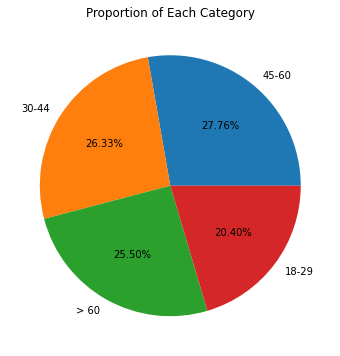

In [29]:
import matplotlib.pyplot as plt

# Plot proportions of age range as pie chart
category_count = df['Age'].value_counts()
proportions = category_count / category_count.sum()
sizes = proportions.values * 100

# Pie Chart
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=proportions.index, autopct='%1.2f%%')
plt.title('Proportion of Age Range')
plt.show()

Text(0.5, 1.0, 'General Feelings of moving to be closer to friends')

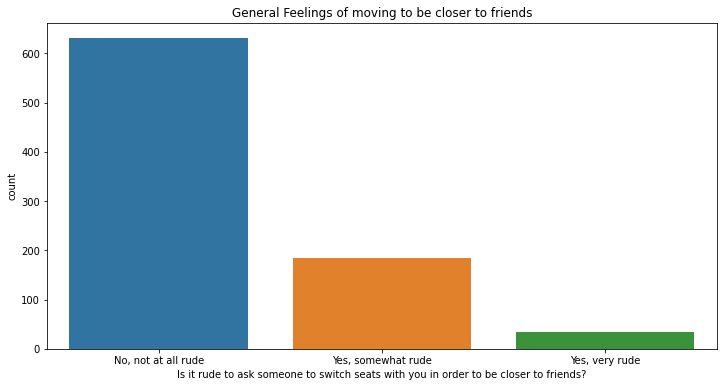

In [31]:
# create distribution of 'Is it rude to ask someone to switch seats with you in order to be closer to friends?'
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Is it rude to ask someone to switch seats with you in order to be closer to friends?')
plt.title('General Feelings of moving to be closer to friends')

<Axes: xlabel='Age'>

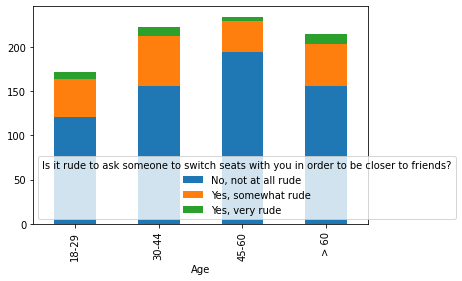

In [43]:
# create stacked bar chart to show age as a variable
pivot_df = df.pivot_table(index='Age', columns='Is it rude to ask someone to switch seats with you in order to be closer to friends?', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked='True')

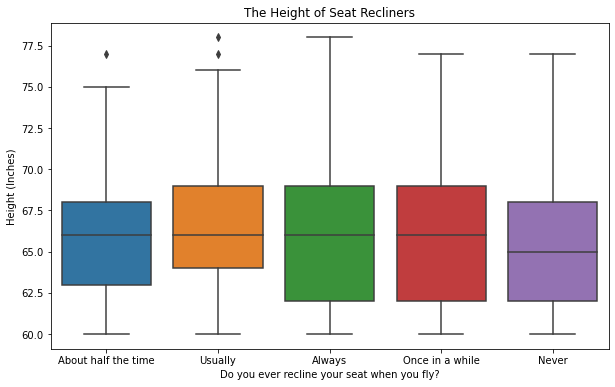

In [39]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Do you ever recline your seat when you fly?', y='Height (Inches)', data=df)
plt.title('The Height of Seat Recliners')
plt.show()